# Sobreajuste de Elefantes

### El siguiente notebook tiene por finalidad dar una solución al propblema propuesto por El Colegio de Matemáticas Bourbaki, el cual consiste en los siguientes pasos:  

## <br>
### a) Construir un dataset sintético supervisado con por lo menos 1,000 registros, una variable explicativa y exactamente dos variables dependientes.

### b) Proponer un método de entrenamiento y modelo matemático (redes neuronales, funciones kernel, regresión gaussiana, etc.) que al entrenarse en el dataset propuesto dibuje en dos coordenadas la silueta parecida a la de un elefante. Es posible parametrizar estar curva como dos funciones de una coordenada horizontal y otra vertical.

## <br>

### Pueden utilizar las coordenadas del elefante construido en el siguiente [artículo](https://pubs.aip.org/aapt/ajp/article-abstract/78/6/648/1042069/Drawing-an-elephant-with-four-complex-parameters?redirectedFrom=fulltext). Es posible agregar cualquier tipo de ruido a las coordenadas de esta figura, hacerlo es obligatorio.

## <br>

### De esta manera se ofrecen propuestas que contemplen justo los puntos descritos.


## 0.- Carga de bibliotecas y variables globales.

In [ ]:
#Para la generación del Dataset
import numpy as np
import pandas as pd

#Para visualizar resultados
import pylab as pl
import matplotlib.pyplot as plt

#Para la generación del modelo (Support Vector Classification)
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## 1.- Generación del Dataset

### Para la generación del Dataset, nos hemos basado en un artículo muy similar al propuesto:

### <center> https://en.wikipedia.org/wiki/Von_Neumann%27s_elephant </center>

### En el cual ya se cuentan con las ecuaciones establecidas para el dibujo del elefante (2 parámetros), que son:

<br>

### x(t) = -60*cos(t) + 30*sin(t) + -8*sin(2*t) + 10*sin(3*t)
### y(t) =  50*sin(t) + 18*sin(2*t) -12*cos(3*t) + 14*cos(5*t)

<br>

### Luego entonces, de acuerdo con los lineamientos del inciso (a), la propuesta para conformar los datos es:

* ### <b>La variable explicativa</b>: una bandera 1 si la tupla (x,y) forma parte de la "frontera" del elefante, 0 en otro caso. Esto implícitamente indica que se ha sugerido un modelo de CLASIFICACIÓN para poder resolver el problema.

* ### <b>Variables dependientes</b>: x(t) & y(t), siendo <b>t</b> el valor que va a usarse para inicializar mas no va a incluirse en el Dataset.

### La dependencia es la que se comentaba justo en la parte de la variable explicativa, es decir, si una coordenada pertenece o no a la frontera.

<br>

### En lo concerniente al ruido, la propuesta consiste en añadir puntos aleatorios cuya bandera sea 0, ya que no pertenecen a la frontera del elefante.

In [ ]:
# Parte 1: Generación del Dataset.

# Se generan los valores de t, por simplicidad el límite que se pone es de 0 a 10.
#Con esta configuración se tiene un total de 1000 puntos de la frontera.
t = np.arange(0,10,0.01)

print("Número de puntos iniciales: ",len(t))

#Con base en t, se obtienen los valores x & y.
x = -60*np.cos(t) + 30*np.sin(t) + -8*np.sin(2*t) + 10*np.sin(3*t)
y = 50*np.sin(t) + 18*np.sin(2*t) -12 * np.cos(3*t) + 14*np.cos(5*t)


#De igual manera, se generan puntos aleatorios que fungen como ruido (otros 1000 puntos)
x_noise =  np.random.uniform(low=-100, high=100, size=(1000,))
y_noise =  np.random.uniform(low=-100, high=100, size=(1000,))


#A continuación se genera el dataframe que contiene tanto los puntos que forman
#parte de la frontera (flag 1), como los que no (flag 0).

#https://pandas.pydata.org/docs/user_guide/merging.html
#https://www.geeksforgeeks.org/pandas-how-to-shuffle-a-dataframe-rows/
#https://stackoverflow.com/questions/22071987/generate-random-array-of-floats-between-a-range


#El dataframe de la frontera del elefante.
df1 = pd.DataFrame({'flag':1,'v1':x,'v2':y})
#df1

#El dataframe del ruido.
df2 = pd.DataFrame({'flag':0,'v1':x_noise,'v2':y_noise})
#df2

#Se unen ambos dataframes.
df_final = pd.concat([df1,df2])

#Se desordenan los elementos para garantizar un dataset "auténtico"
df_final = df_final.sample(frac = 1)

print(df_final)

Número de puntos iniciales:  1000
     flag         v1         v2
352     0 -25.084499 -86.178730
894     1  83.596400  20.398024
834     0 -83.191299 -25.971570
9       1 -55.825730   8.757468
944     1  58.836388  -2.185144
..    ...        ...        ...
510     0 -48.209240  38.833335
813     1  42.648342  16.082201
989     1  23.902560   3.690951
242     1  81.084851  20.964327
961     1  45.277451  -0.910385

[2000 rows x 3 columns]


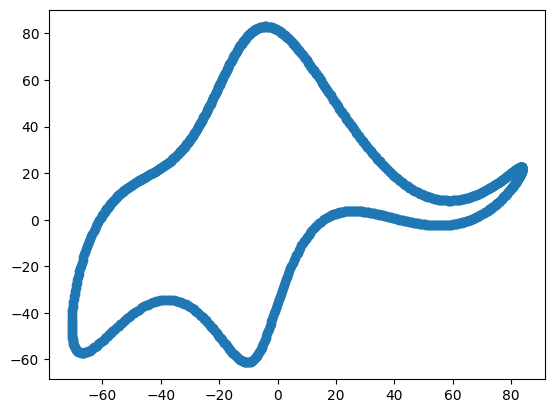

In [ ]:
#A continuación se visualizan los valores para garantizar que la operación tenga sentido:
#Esta es la frontera del elefante.
plt.plot(x,y,'o')

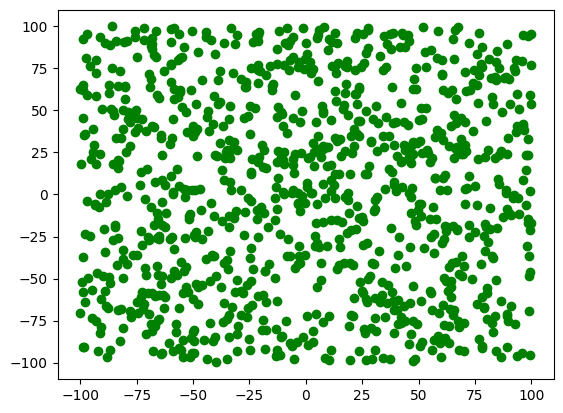

In [ ]:
#Estos son los puntos aleatorios.
plt.plot(x_noise,y_noise,'o',c='green')

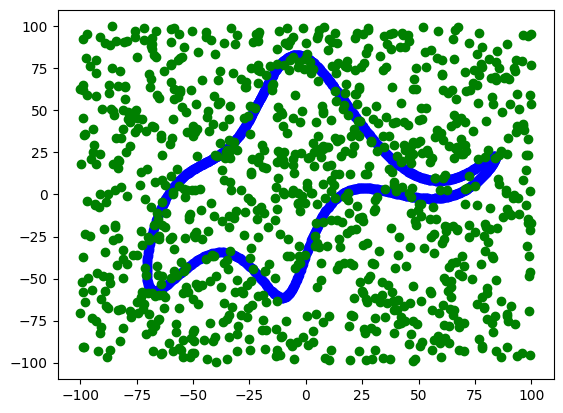

In [ ]:
#Al final se visualizan ambas secciones para dar lugar al dataset completo.
#https://www.tutorialspoint.com/how-to-plot-overlapping-lines-in-matplotlib

line1 = plt.plot(x,y,'o', c='blue')
line2 = plt.plot(x_noise,y_noise,'o',c='green')
plt.show()

#Como se puede apreciar, se tiene un dataset sintético consistente.

### 1.1.- División del Dataset en entrenamiento y prueba.

In [ ]:
#A continuación se hace la división de los conjuntos en entrenamiento y prueba.

#Primero se separa la variable predictiva de los predictores:
y = df_final["flag"]
X = df_final.drop(["flag"], axis = 1)

#A continuación se hace la división entre entrenamientos y prueba, tanto para X como y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Variable predictiva: ")
print(y)
print("-------------------")
print("Predictores: ")
print(X)

Variable predictiva: 
352    0
894    1
834    0
9      1
944    1
      ..
510    0
813    1
989    1
242    1
961    1
Name: flag, Length: 2000, dtype: int64
-------------------
Predictores: 
            v1         v2
352 -25.084499 -86.178730
894  83.596400  20.398024
834 -83.191299 -25.971570
9   -55.825730   8.757468
944  58.836388  -2.185144
..         ...        ...
510 -48.209240  38.833335
813  42.648342  16.082201
989  23.902560   3.690951
242  81.084851  20.964327
961  45.277451  -0.910385

[2000 rows x 2 columns]


Cuántos elementos de entrenamiento: 
v1    1400
v2    1400
dtype: int64


Text(0.5, 0.98, 'Distribución V1 y V2 ENTRENAMIENTO')

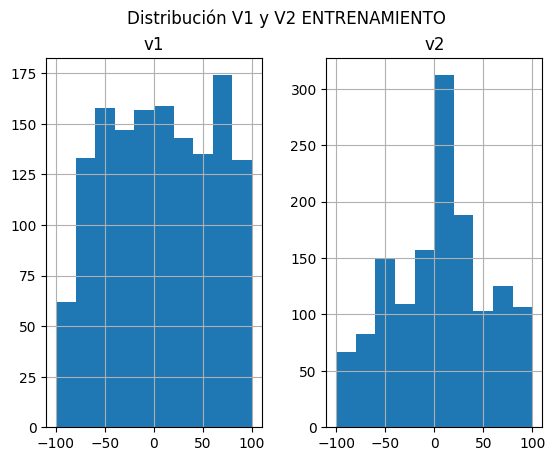

In [ ]:
#Para verifiar que tanto los entrenamientos como pruebas tienen una distribución parecida
#https://stackoverflow.com/questions/19614400/add-title-to-collection-of-pandas-hist-plots

X_train.hist()
print("Cuántos elementos de entrenamiento: ")
print(X_train.count())
pl.suptitle("Distribución V1 y V2 ENTRENAMIENTO")

Cuántos elementos de prueba: 
v1    600
v2    600
dtype: int64


Text(0.5, 0.98, 'Distribución V1 y V2 PRUEBA')

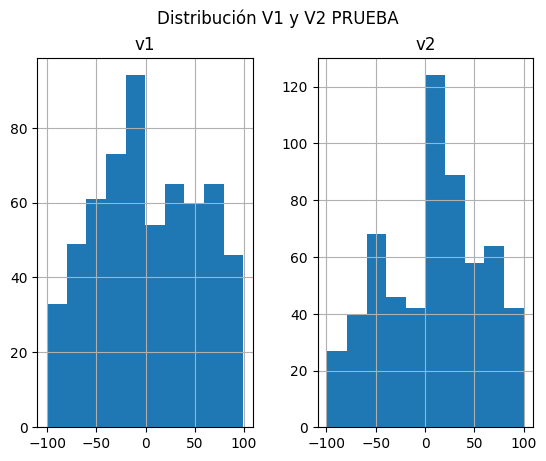

In [ ]:
X_test.hist()
print("Cuántos elementos de prueba: ")
print(X_test.count())
pl.suptitle("Distribución V1 y V2 PRUEBA")

#Como se puede apreciar, las distribuciones son muy similares.

Cuántos elementos de variable predictiva entrenamiento: 
1400


Text(0.5, 0.98, 'Distribución variable predictiva ENTRENAMIENTO')

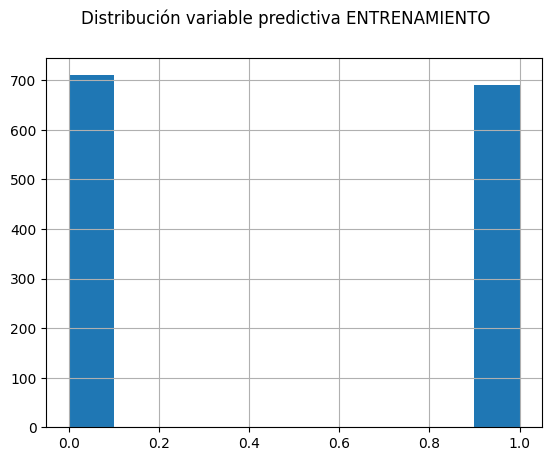

In [ ]:
y_train.hist()
print("Cuántos elementos de variable predictiva entrenamiento: ")
print(y_train.count())
pl.suptitle("Distribución variable predictiva ENTRENAMIENTO")

Cuántos elementos de variable predictiva prueba: 
600


Text(0.5, 0.98, 'Distribución variable predictiva PRUEBA')

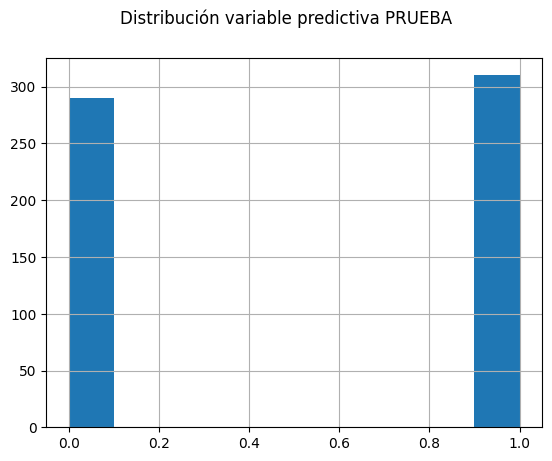

In [ ]:
y_test.hist()
print("Cuántos elementos de variable predictiva prueba: ")
print(y_test.count())
pl.suptitle("Distribución variable predictiva PRUEBA")

#Como puede apreciarse en las imágenes, también la variable predictiva cuenta
#con una distribución similar.

## 2.- Generación del Modelo y Resultados

### Al haber optado por el dataset supervisado con banderas 0 y 1, es natural pensar en que se ha elegido un método de clasificación, lo cual se confirma.

### Pero el aporte en este trabajo ha significado buscar algún modelo alternativo a la Regresión Logística que no fuera "tan rígido" o "tan lineal" y por ende, más flexible, como lo indica estos artículos.

* ### https://geeksforgeeks.org/differentiate-between-support-vector-machine-and-logistic-regression/

* ### https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16#:~:text=Difference%20between%20SVM%20and%20Logistic%20Regression&text=SVM%20is%20based%20on%20geometrical,regression%20is%20vulnerable%20to%20overfitting.


### De hecho es justo la propiedad geométrica de Support Vector Machine la que llama la atención pues estaría muy relacionada con la formación de la figura del elefante y es así como se ha elegido dicha técnica, más en concreto, su implementación conocida como Support Vector Clasification.

* ### https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### De esta manera se trabaja con esta técnica de tal manera que en el notebook se deja la configuración que genera la mayor eficiencia en la clasificación mientras que se adjuntan capturas de pantalla con las pruebas de ensayo-error adicionales.

In [ ]:
#Se genera el modelo con los siguientes parámetros:

# C = parámetro de regularización inversamente prpoorcional.
# Se dejó en 10 para ser un poco más laxo.

# gamma = este parámetro tiene que ver con el concepto de Kernel, que,
# de acuerdo con lo que se ha estudiado:

#https://medium.com/@apurvjain37/support-vector-machine-s-v-m-classifiers-and-kernels-9e13176c9396

#Se trata de una "frontera no lineal" con la cual se puede hacer la clasificación.
#El valor 'auto' indica un valor de 1/#features que en este caso es 1/2
classifier = SVC(C=10, gamma = 'auto')

#Se entrena el modelo con los conjuntos correspondientes.
classifier.fit(X_train, y_train)

#Se hace la clasificación con el conjunto de prueba y, dado que los resultados
#son números entre 0 y uno, se hace un redondeo para que queden sólo valores 1 ó 0.
y_pred = classifier.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

#Al elegir un modelo de clasificación, se opta por la matriz de confusión
#para poder evaluar su desempeño.
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(y_test, y_pred)

array([[284,   6],
       [ 13, 297]])

### Para esta prueba definitiva se puede analizar, con base en la matriz de confusión, podemos detectar que sólo 19 casos de 600 (3%), ha sido clasificado incorrectamente, pero en general el modelo ha tenido un buen desempeño.

### Con respecto de la elección de parámetros, éstas se han elegido a modo de ensayo y error; en particular se destaca que el parámetro que ha causado principalmente este incremento en la precisión ha sido gamma ya que al ponerse como está en la configuración actual, ha incrementado por mucho la sensibilidad de la precisión.

### Aquí se incluyen las imágenes de los intentos previos con sus correspondientes matrices de confusión.

* ### Prueba 1 (parámetros por defecto: C = 1 y gamma = 'scale'):
### Como se puede apreciar, hay 133 falsos positivos, lo cual nos da un desempeño medio considerando de que hablamos de aproximadamente un 20% de fallas.

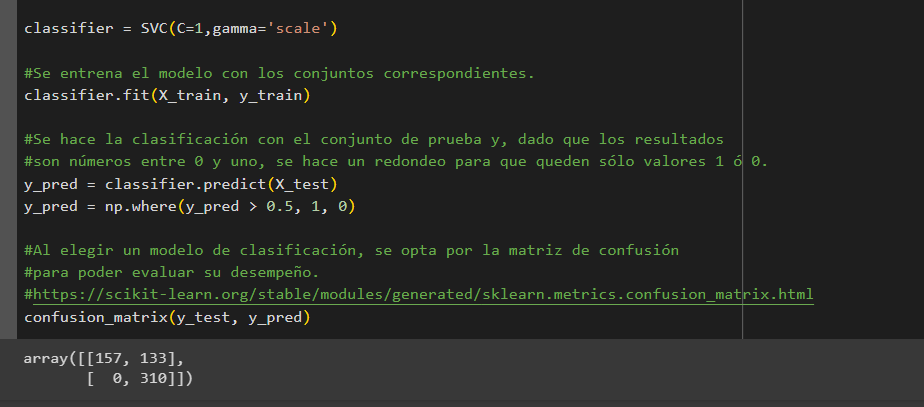


* ### Prueba 2 (parámetros: C = 2 y gamma = 'scale'):
### Podemos reconocer que se ha disminuido el número de falsos positivos pero el de falsos negativos aumentó.

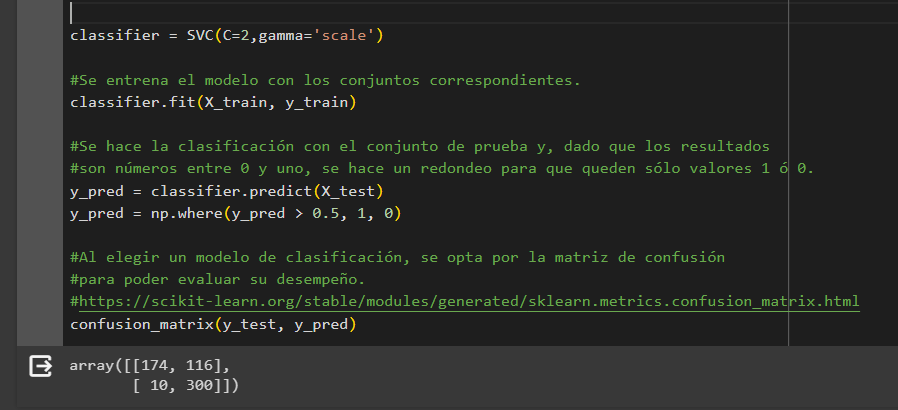

* ### Prueba 3 (parámetros: C = 3 y gamma = 'scale'):
### Podemos ver que se ha disminuido el número de falsos positivos y el de falsos negativos se ha mantenido estable.

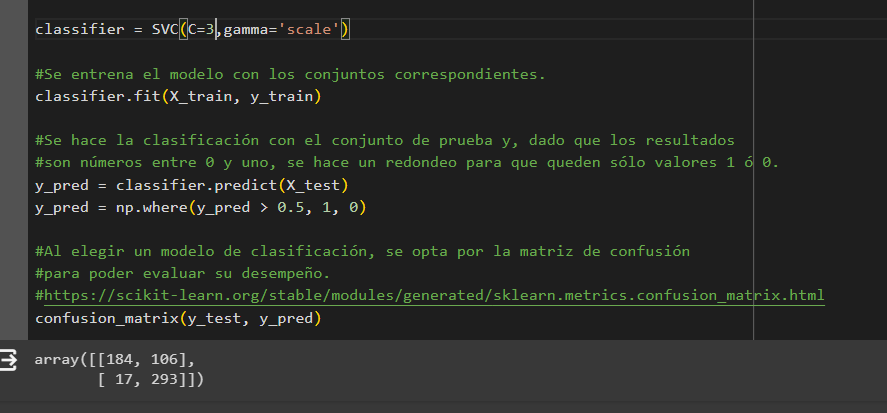


* ### Prueba 4 (parámetros: C = 10, gamma = 'scale')
### Esta prueba se hizo para ver qué sucedía con valores más extremos, y el resultado no ha sido tan malo comparándose con las otras pruebas.

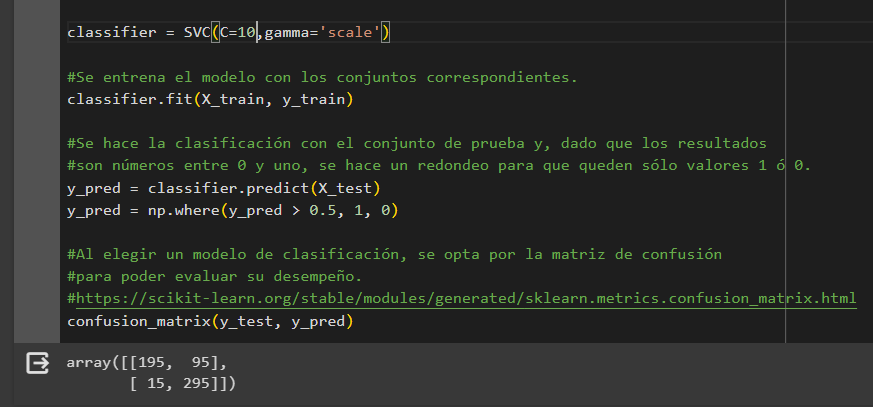

In [ ]:
#La siguiente parte consiste en visualizar los puntos del elefante que el modelo sugiere
#VERSUS los puntos que se habían construido sintéticamente al inicio, para ello se crea
#un dataframe especial que contiene las coordenadas del conjunto de PRUEBA, así como las
#banderas generadas tanto por la parte sintética como por la predicción.

#https://stackoverflow.com/questions/44723377/pandas-combining-two-dataframes-horizontally


df_final_show = pd.concat([pd.DataFrame(X_test.reset_index()),pd.DataFrame(y_test.reset_index()),pd.DataFrame(y_pred)], axis = 1)
df_final_show.columns = ["index_1","v1","v2","index_2","y_test","y_pred"]
df_final_show = df_final_show.drop(["index_1","index_2"],axis = 1)

df_final_show

,v1,v2,y_test,y_pred
0,-10.359499,-61.304139,1,1
1,64.799967,9.258966,1,1
2,-37.148817,24.757060,1,1
3,75.944498,7.800297,1,1
4,-85.345381,18.326843,0,0
...,...,...,...,...
595,-9.923387,20.402481,0,0
596,72.259898,90.345438,0,0
597,-27.581370,39.042544,1,1
598,30.112872,3.370503,1,1


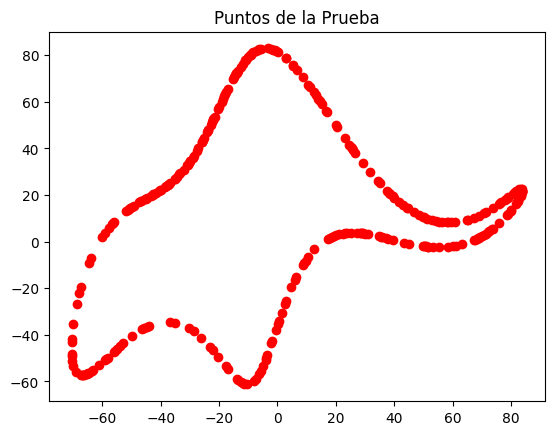

In [ ]:
#Posteriormente lo que se obtiene son las coordenadas en cada caso con la
#bandera en 1, es decir, las coordenadas del test cuya bandera es 1, así como
#las coordenadas en la predicción cuya bandera es 1.

#Coordenadas del test.
final_v1_test = df_final_show[df_final_show["y_test"] == 1]["v1"].to_list()
final_v2_test = df_final_show[df_final_show["y_test"] == 1]["v2"].to_list()

#Coordenadas de la predicción.
final_v1_pred = df_final_show[df_final_show["y_pred"] == 1]["v1"].to_list()
final_v2_pred = df_final_show[df_final_show["y_pred"] == 1]["v2"].to_list()


#a continuación se imprimen los puntos del test.
plt.title("Puntos de la Prueba")
plt.plot(final_v1_test,final_v2_test,'o', c='red')

#Como puede apreciarse, se observa en gran medida que el modelo dibuja con bastante
#precisión la silueta del elefante (color azul), sí, existen 23 casos donde no pero
#considerando todo el conjunto de prueba (600) es una cantidad pequeña.

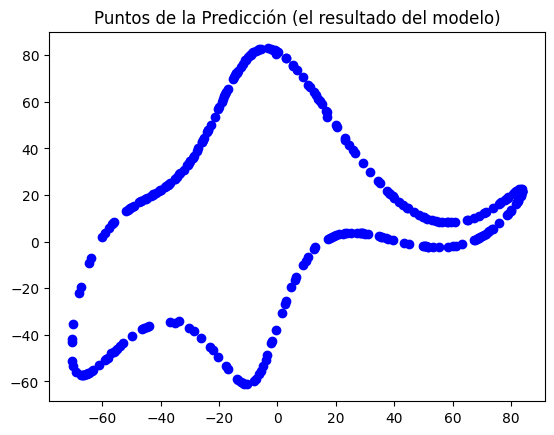

In [ ]:
#Se imprimen los puntos de la predicción.
plt.title("Puntos de la Predicción (el resultado del modelo)")
plt.plot(final_v1_pred,final_v2_pred,'o', c='blue')

## 3.- Comparaciones, Conclusiones y Siguientes Pasos

### Como se ha podido apreciar, con el uso del dataset sintético y abordando el problema con un problema de clasificación cuyo modelo a emplear ha sido Support Vector Machine (Support vector Classification), se ha podido dibujar con bastante precisión la silueta del elefante.

<br>

### Es importante mencionar que se tiene la certeza de que el hecho de que SVM tiene un enfoque más geométrico ha podido generar la silueta con puntos que para una aproximación lineal hubiera sido muy difícil.

### Mucho ha influido el parámetro gamma en modo 'auto' ya que con éste la sensibilidad en la clasificación ha aumentado drásticamente, y en relación con el parámetro C se comprobó que mientras más laxo era, mejor clasificaba.

<br>

### Como pasos futuros, se puede hacer una comparación entre el uso de SVC y la Regresión Logística o con cualquier otro modelo de clasificación para resaltar fortalezas y debilidades de cada uno.

### Otro ejercicio a analizar es el del siguiente artículo donde en teoría se puede hacer la simulación de la silueta con un solo parámetro:

* ### http://colala.berkeley.edu/papers/piantadosi2018one.pdf

### Sin embargo, el artículo está incompleto ya que muchos valores faltan pero es un buen indicio para indagar.